<center> <h1> AKR Project </h2> </center>  
<center> <h2> SUPERSTORE BUSINESS ANALYSIS <h3> </center> 

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


# Exploratory Data Analysis (EDA)
## 1. Overview of the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/superstore-sales-dataset/SuperStoreOrders.csv')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [3]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


**ROWS AND COLUMNS OF DATASET**

In [4]:
df.shape

(51290, 21)

**HEADERS OF ALL THE COLUMNS**

In [5]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

**Check for any duplicate in Dataset**

In [6]:
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


None.

**DATA TYPES OF COLUMN**

In [7]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

**Changing the Incorrect Data Types**

In [8]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [9]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

**Check for Null Values**

In [10]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [11]:
df['sales'] = df['sales'].fillna(0)

In [12]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

**Function return Series with number of distinct observations over requested axis**

In [13]:
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales               993
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

**BASICS STATISTICS OF DATA**

In [14]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-04-30 17:16:21.384285440,2013-05-05 19:10:10.504971520,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-02 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-06-06 00:00:00,2012-06-13 00:00:00,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-06-26 00:00:00,2013-06-30 00:00:00,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-04-30 00:00:00,2014-05-09 00:00:00,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-07-01 00:00:00,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931


In [15]:
# Total sales across all years
total_sales = df['sales'].sum()

# Total profit across all years
total_profit = df['profit'].sum()

# Total orders
total_orders = df['order_id'].nunique()

# Average sales per order
avg_sales_per_order = df['sales'].mean()

# Average profit per order
avg_profit_per_order = df['profit'].mean()

print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Profit: ${total_profit:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Sales per Order: ${avg_sales_per_order:.2f}")
print(f"Average Profit per Order: ${avg_profit_per_order:.2f}")


Total Sales: $7835128.00
Total Profit: $1469034.82
Total Orders: 25035
Average Sales per Order: $152.76
Average Profit per Order: $28.64


## 2.Visualizing Insights
###  Sales Trend Over Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


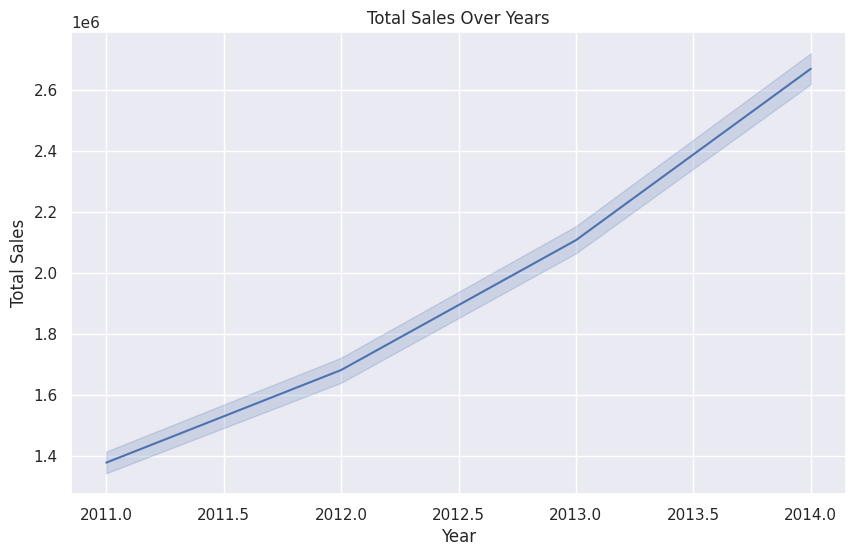

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='sales', data=df, estimator=sum)
plt.title('Total Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


### Market Share by Region


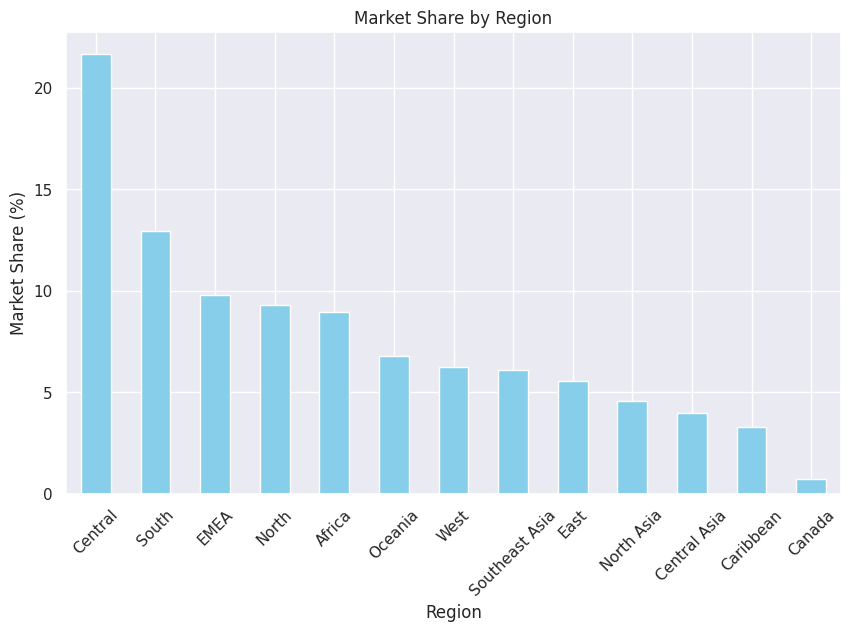

In [17]:
market_share = df['region'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
market_share.plot(kind='bar', color='skyblue')
plt.title('Market Share by Region')
plt.xlabel('Region')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.show()


# **Which segment is the best seller?**

In [18]:
df["segment"].value_counts()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

<Axes: xlabel='segment', ylabel='count'>

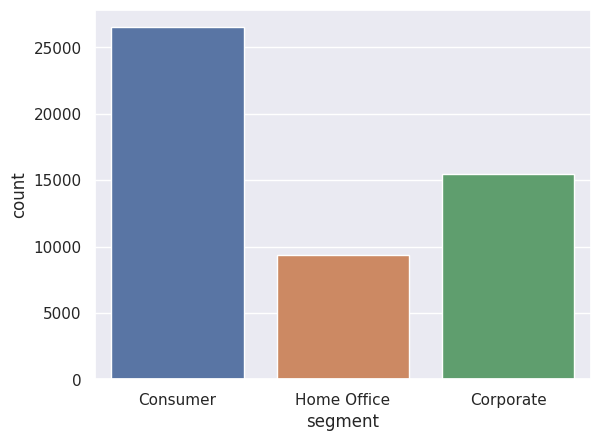

In [19]:
sns.countplot(x=df['segment'])

The Consumer Segment is the best seller.

# **Which Region has the highest order count and In which Region do we need to grow our Business?**

**Which region has the highest order count?**

In [20]:
df["region"].value_counts()

region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

Cental Region has the highest order count.

<Axes: xlabel='region', ylabel='count'>

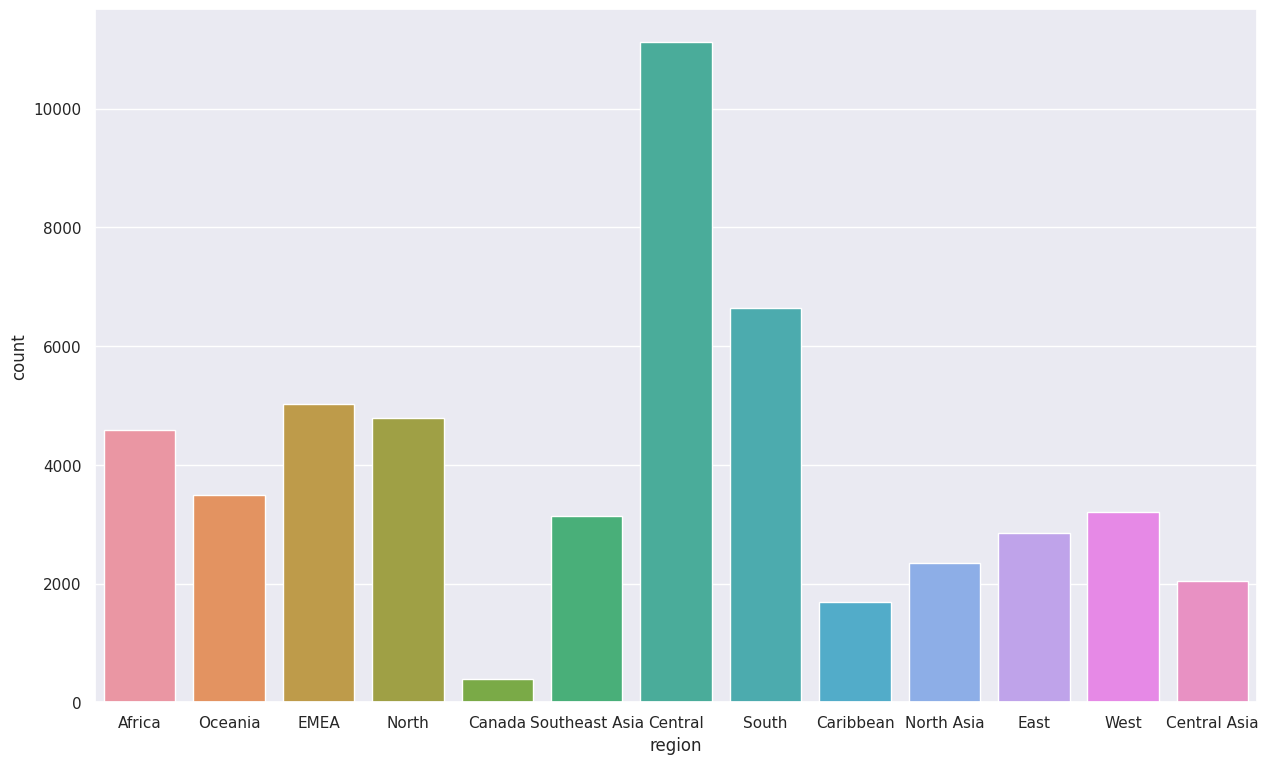

In [21]:
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x=df['region'])

The Business is performing great in the Central Region with highest order count but it needs to Expand it's Business in Canadian Region.

# **Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?**

<Axes: title={'center': 'Customer Name & Product Ordered'}, ylabel='customer_name'>

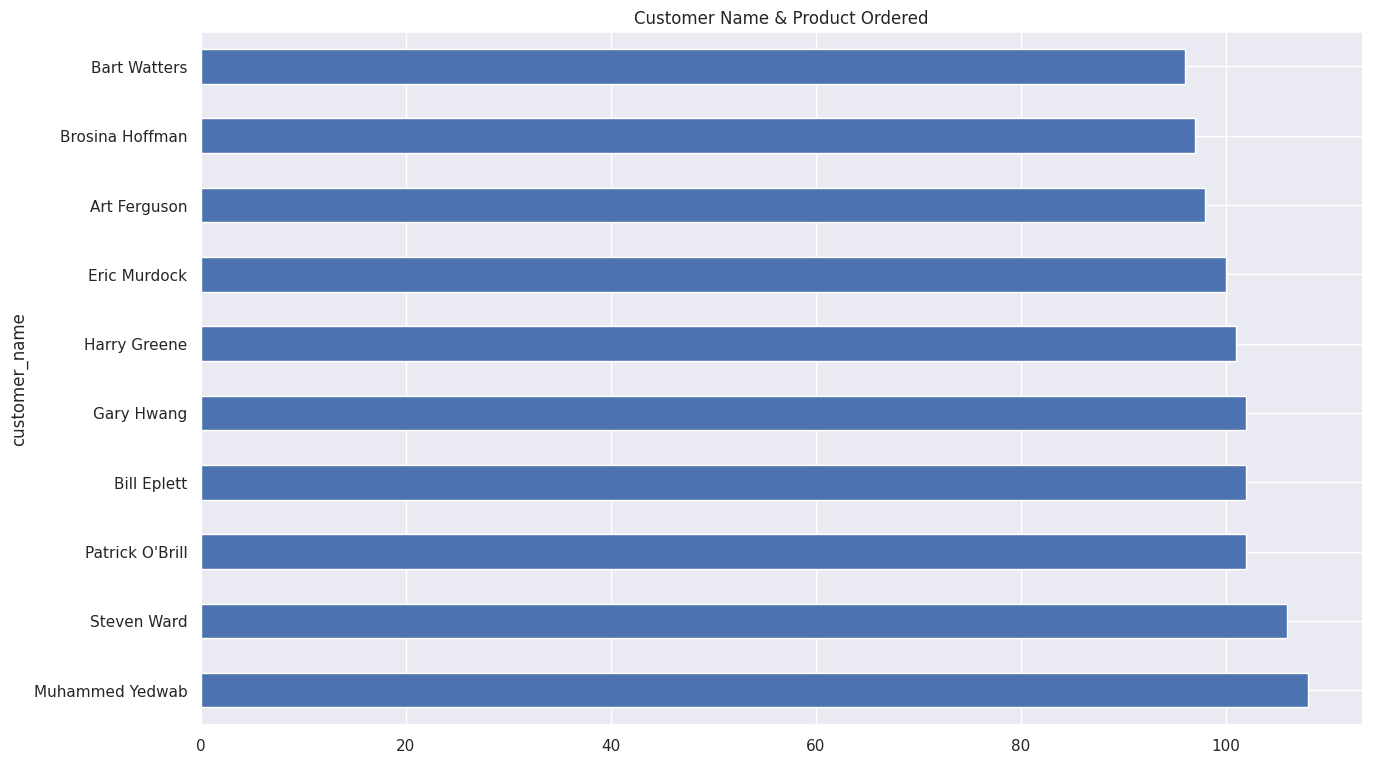

In [22]:
df['customer_name'].value_counts()[:10].plot(kind='barh',title='Customer Name & Product Ordered')

In [23]:
customers = list(df['customer_name'].value_counts()[:10].index)
filters = df['customer_name'].isin(customers)
A = df[filters]

In [24]:
colors = sns.color_palette('pastel')[0:]


values = A.groupby('customer_name')['profit'].sum()
values

customer_name
Art Ferguson       2278.30370
Bart Watters       3595.88590
Bill Eplett        7410.00530
Brosina Hoffman    4876.93980
Eric Murdock       3306.01548
Gary Hwang         3908.11510
Harry Greene       -291.49228
Muhammed Yedwab    2642.65408
Patrick O'Brill    3778.36370
Steven Ward        2794.73160
Name: profit, dtype: float64

Harry Greene is in the list of Top 10 customers but he is actually in Negative which is a loss for our superstore.

In [25]:
A = A[A['customer_name'] != 'Harry Greene']

In [26]:
del customers[-2]

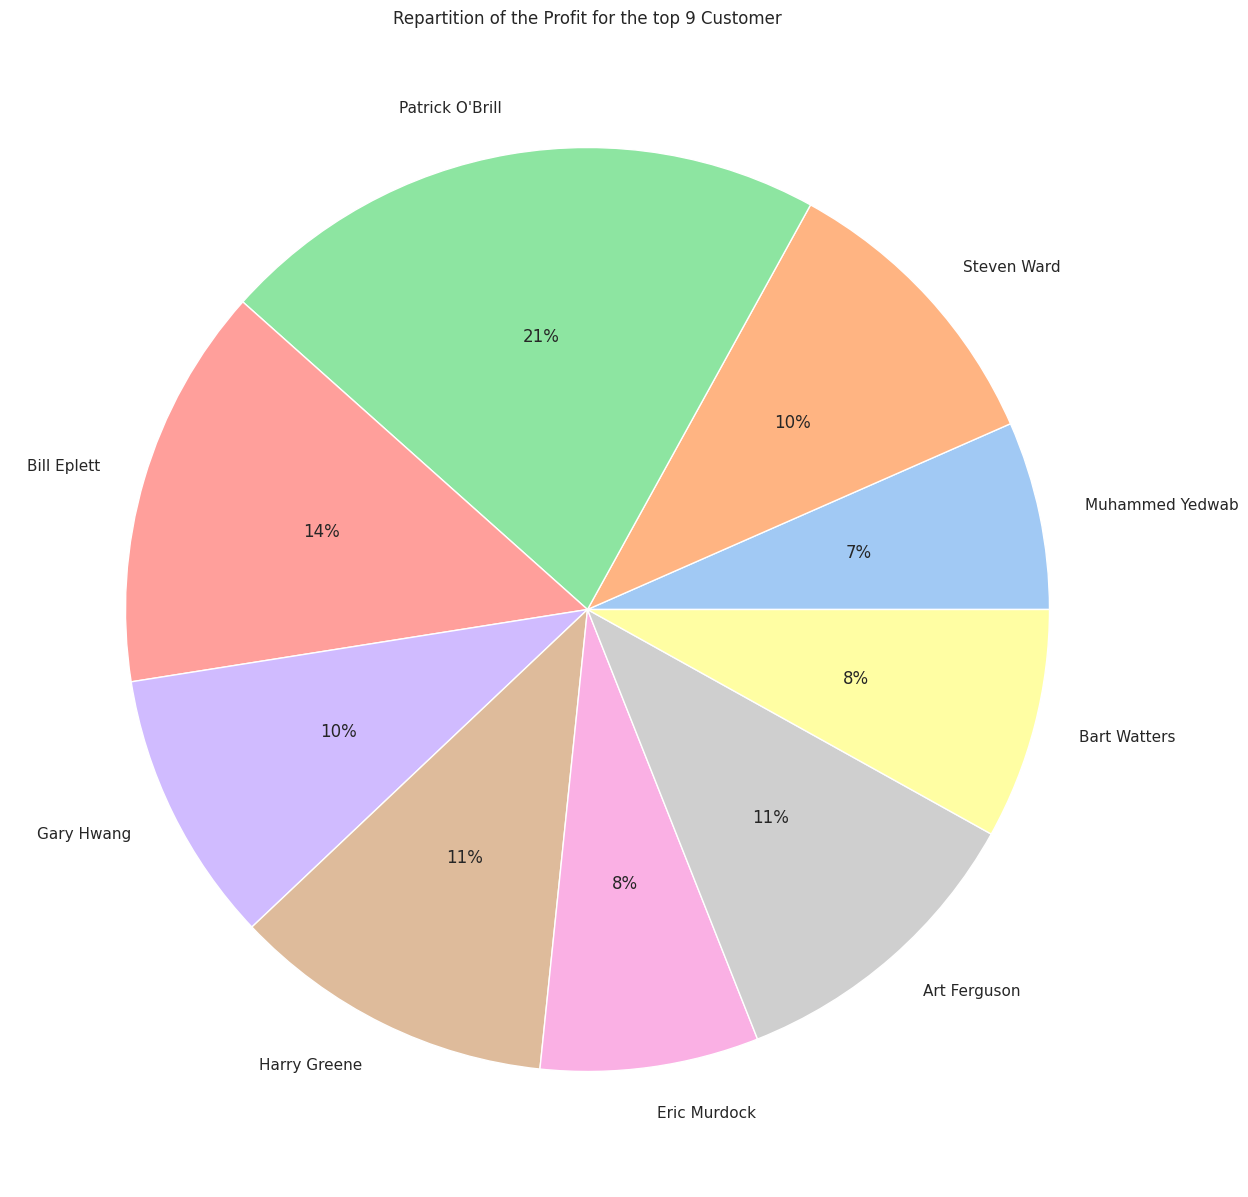

In [27]:
plt.figure(figsize=(15,15))
values = A.groupby('customer_name')['profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the top 9 Customer")
plt.show()

We were able to get the insight that Patrick O'Brill is Best customer and is providing the superstore with Profit of 21%

# **What are the Highest selling and Lowest Selling Sub-Category?**

sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64


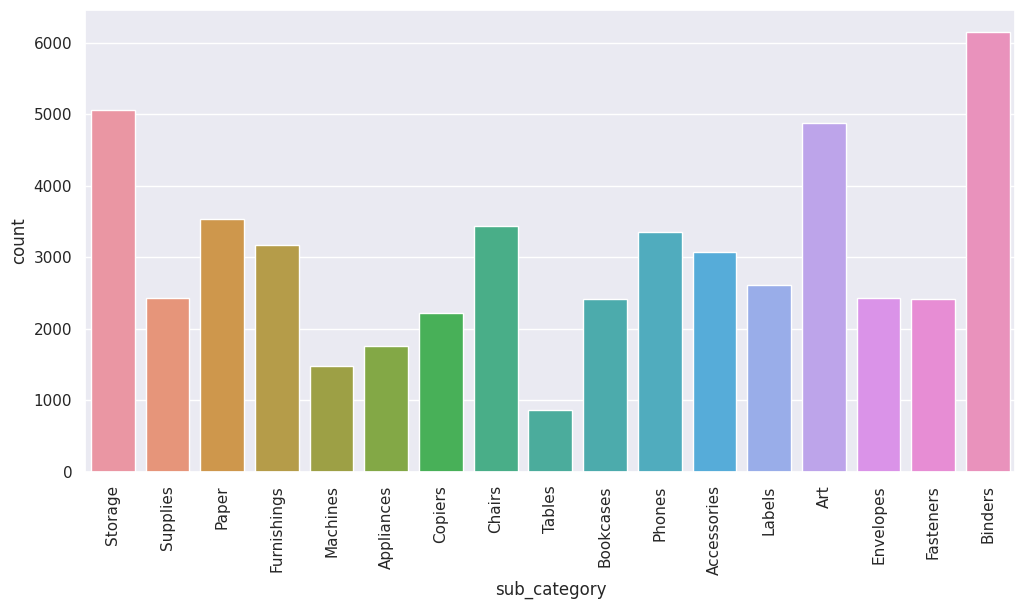

In [28]:
print(df['sub_category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['sub_category'])
plt.xticks(rotation=90)
plt.show()

**Q4(a)How much each Sub-Category is contributing in Sales of SuperStore?**

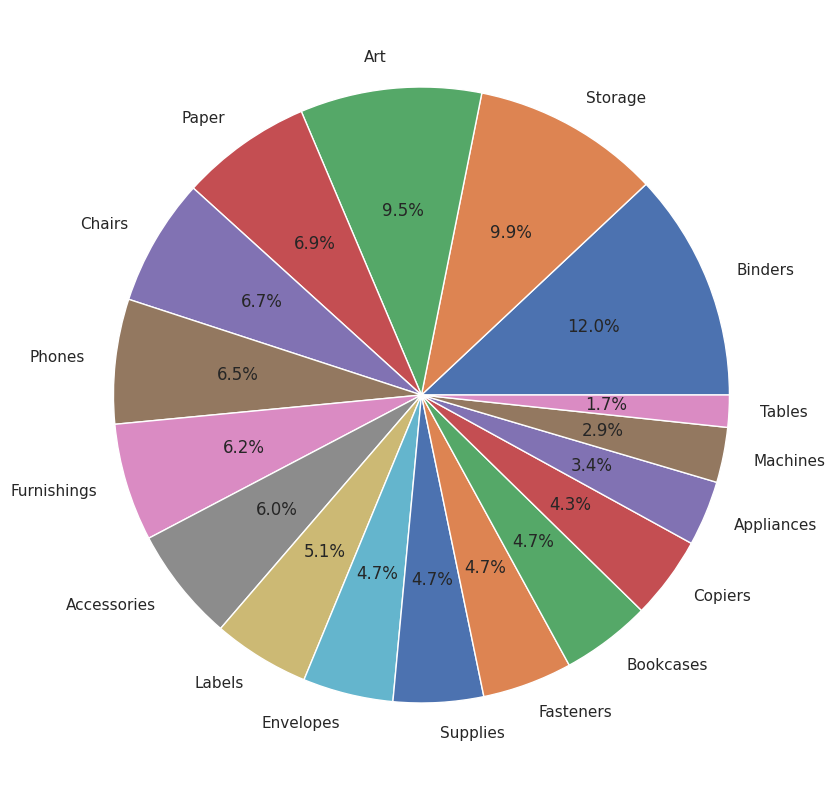

In [29]:
plt.figure(figsize=(15,10))
plt.pie(df['sub_category'].value_counts(),labels=df["sub_category"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

# **What are the Top 10 States with highest Order Count?**

In [30]:
df['state'].value_counts().head(10)

state
California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: count, dtype: int64

<Axes: ylabel='count'>

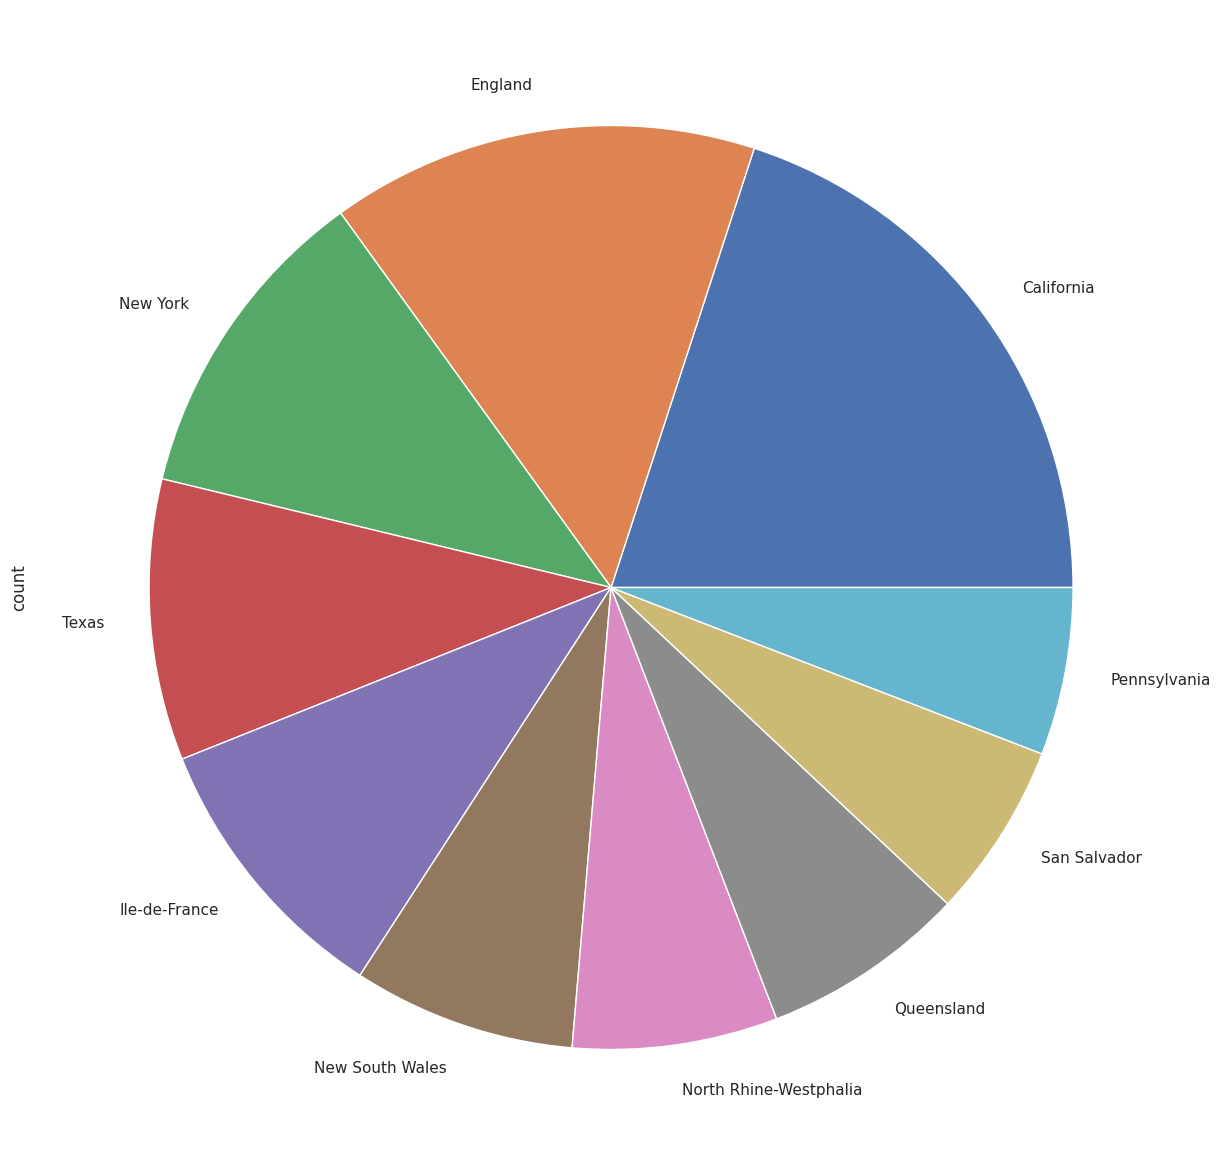

In [31]:
plt.figure(figsize=(20,15))
df['state'].value_counts().head(10).plot.pie()

# **Analyzing the Data by Country**

**CHECK FOR ALL THE COUNTRIES IN DATASET**

In [32]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

**Q6(a)Look for Top 10 Consumer Countries**

In [33]:
df['country'].value_counts()[0:10]

country
United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'countries')

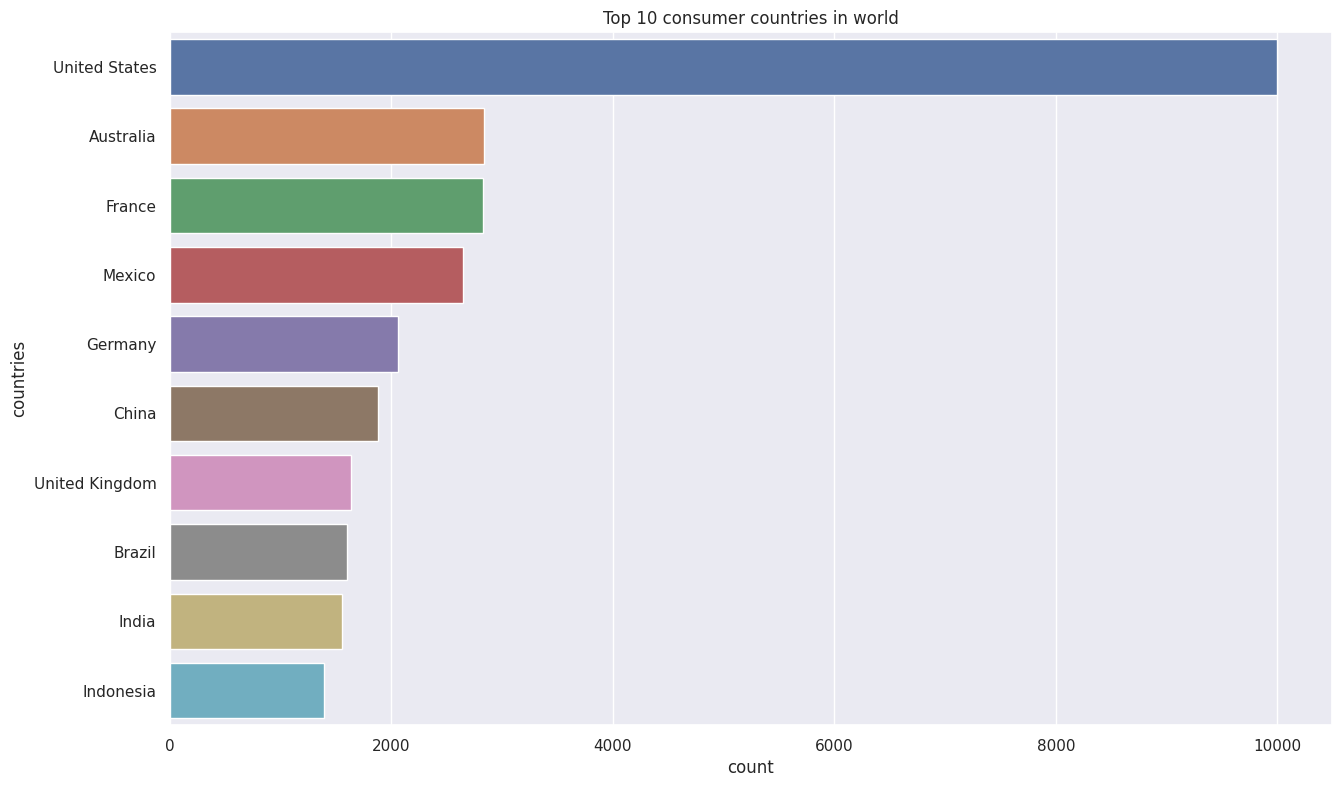

In [34]:
L1=["United States","Australia","France","Mexico","Germany","China","United Kingdom","Brazil","India","Indonesia"]
L2=[9994,2837,2827,2644,2065,1880,1633,1599,1555,1390]
sns.barplot(x=L2,y=L1)
sns.set_theme(style="darkgrid")
plt.title("Top 10 consumer countries in world")
plt.xlabel("count")
plt.ylabel("countries")

UNITED STATES IS THE LARGEST CONSUMER COUNTRY

**What are the Top 3 Consumer Countries orders as per Segment & Category?**

In [35]:
# Top 3 consumer countries orders as per categories & sub-categories
df_US=df[df["country"]=="United States"]
df_Aus=df[df["country"]=="Australia"]
df_FR=df[df["country"]=="France"]



<Axes: title={'center': 'United States'}, xlabel='segment', ylabel='count'>

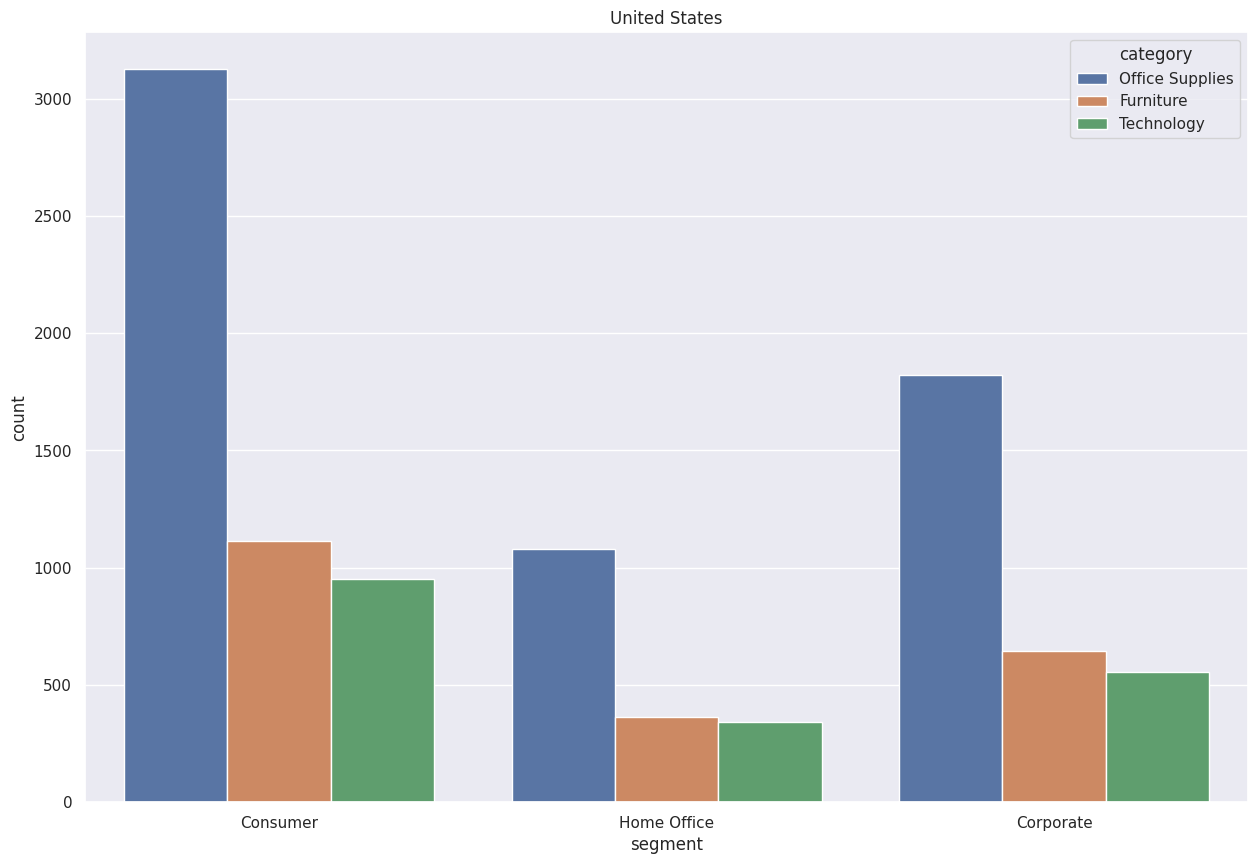

In [36]:
#1st Largest Consumer Country "United States"
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_US["segment"],hue=df_US["category"])

<Axes: title={'center': 'Australia'}, xlabel='segment', ylabel='count'>

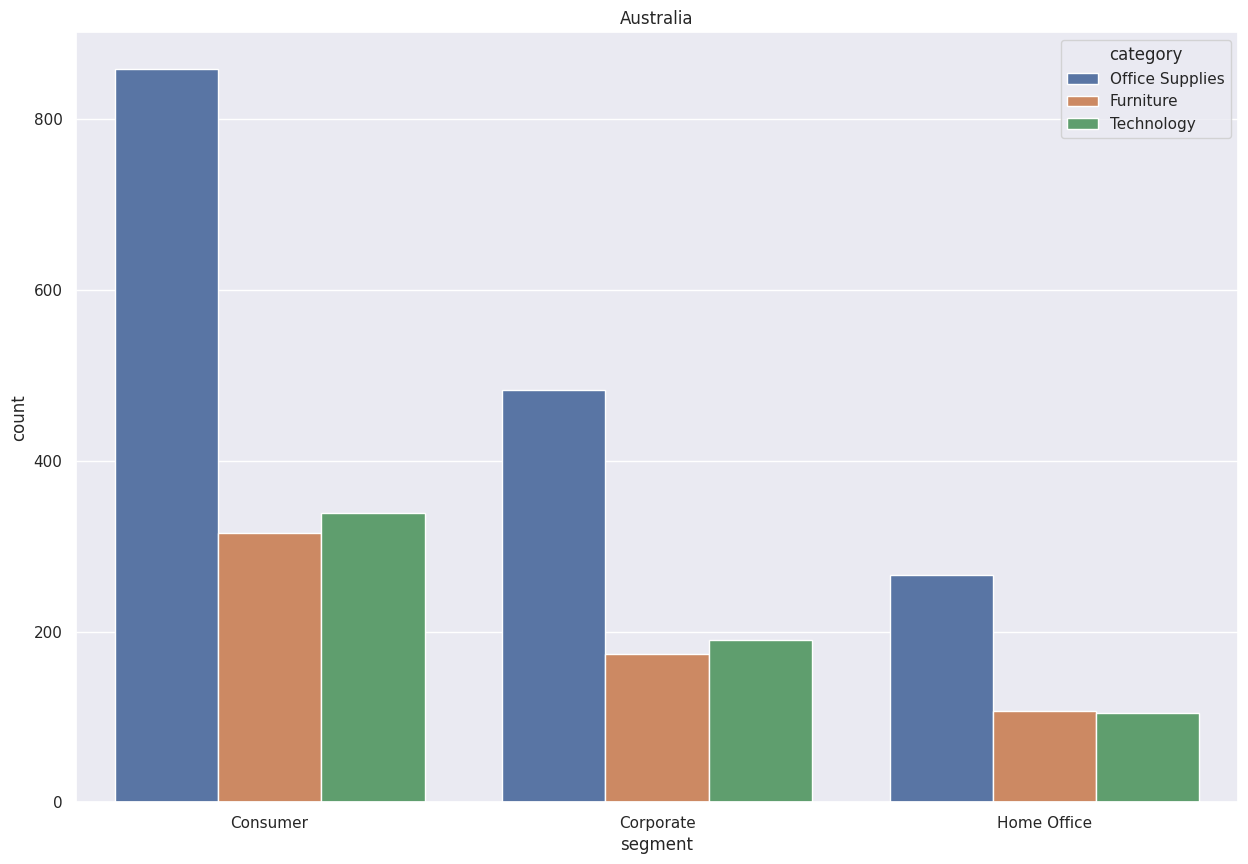

In [37]:
#2nd Largest Consumer Country "Australia"
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_Aus["segment"],hue=df_Aus["category"])

<Axes: title={'center': 'France'}, xlabel='segment', ylabel='count'>

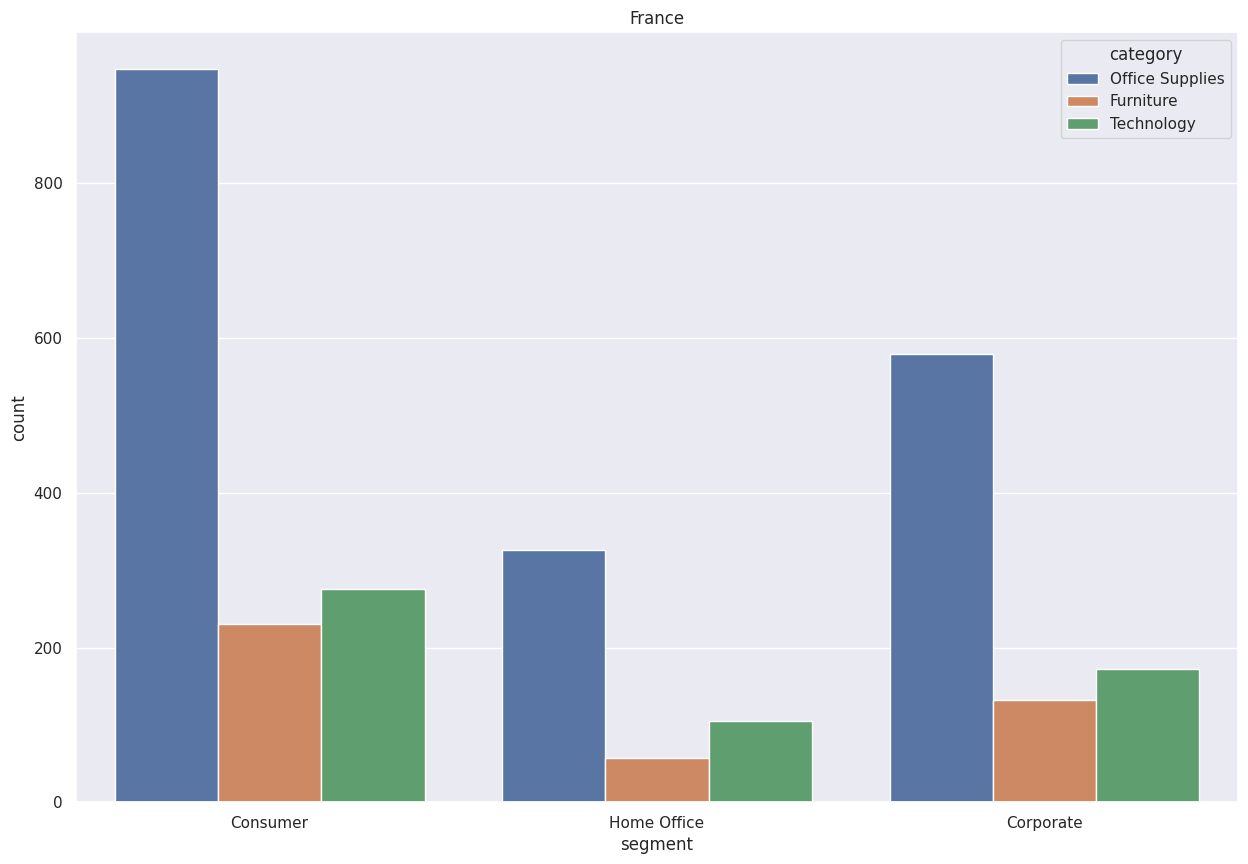

In [38]:
#2nd Largest Consumer Country "Australia"
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_FR["segment"],hue=df_FR["category"])

**What are the product needs of Top 3 countries as per Category & Sub-category?**

<Axes: title={'center': 'United States'}, xlabel='category', ylabel='count'>

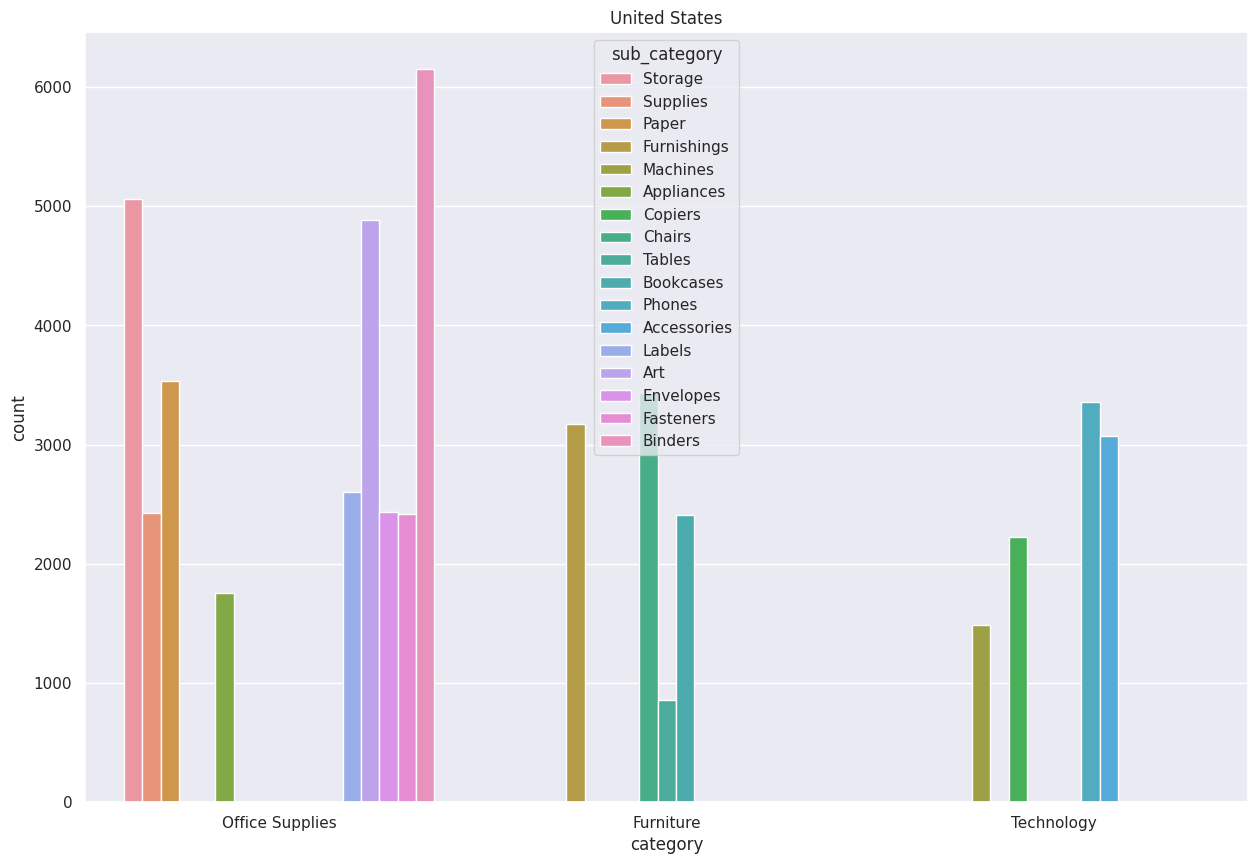

In [39]:
#1st largest consumer country "United States" 
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

<Axes: title={'center': 'Australia'}, xlabel='category', ylabel='count'>

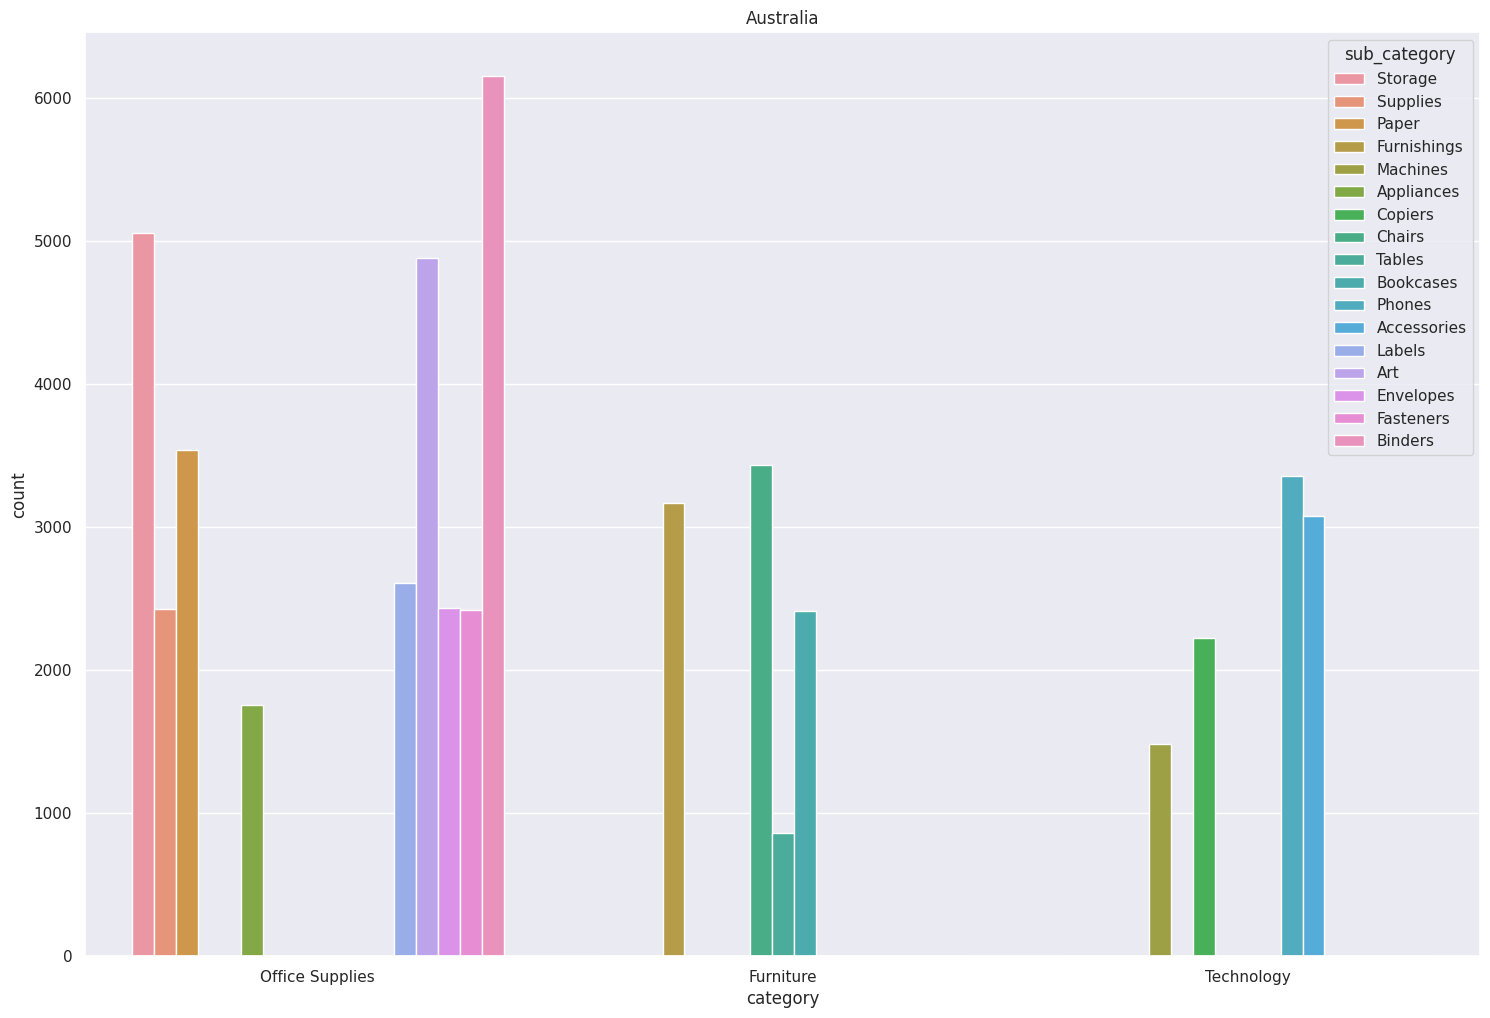

In [40]:
#2nd largest consumer country "Australia" 
plt.figure(figsize=(18,12))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

<Axes: title={'center': 'France'}, xlabel='category', ylabel='count'>

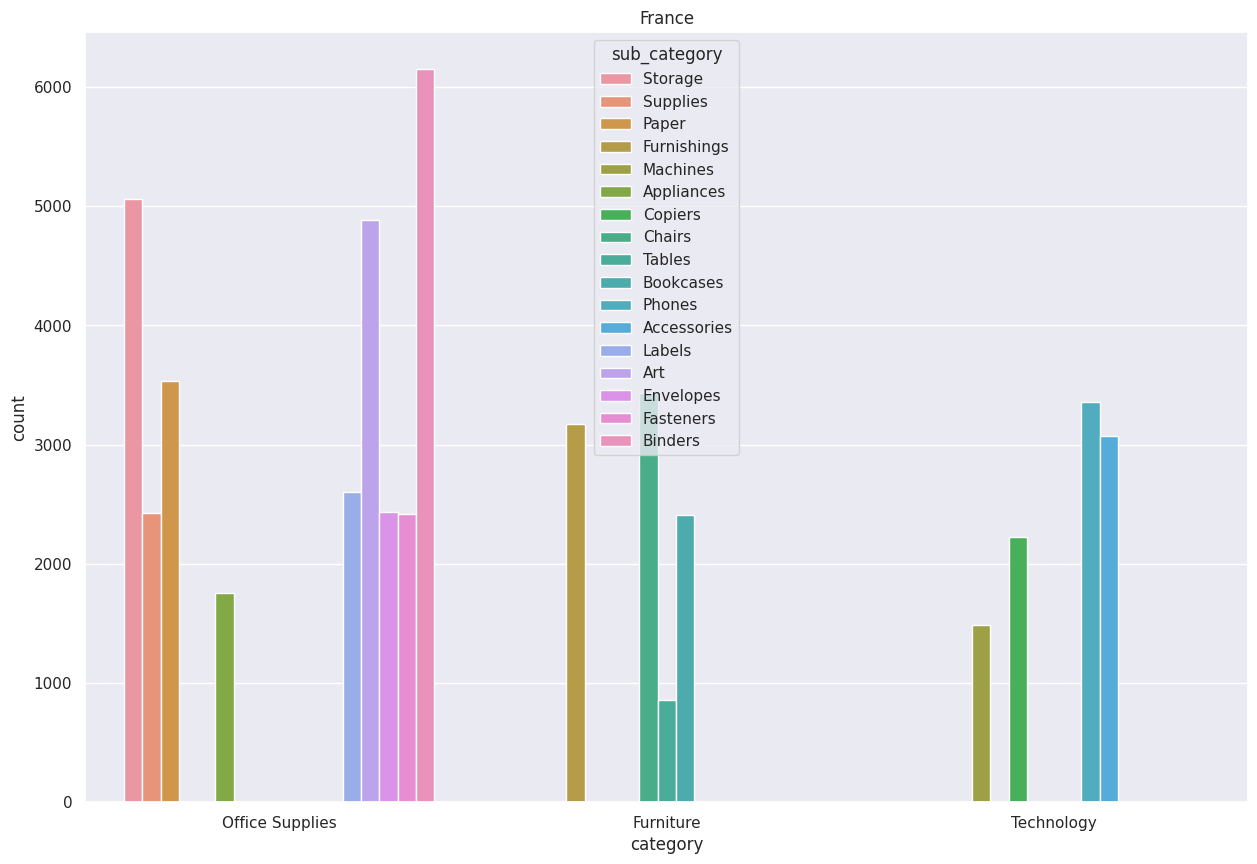

In [41]:
#3rd largest consumer country "France" 
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

**In all 3 Top countries United States, Australia and France Office Supplies is the highest selling Category and with the Binders as highest selling Sub-Category.**

# **Growth of Superstore Sales over the year 2011-2014?**

In [42]:
df["year"].unique()

array([2011, 2012, 2013, 2014])

In [43]:
df["year"].value_counts()

year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

In [44]:
df_1=df.sort_values(by=["year"],ascending=True)

In [45]:
df_2011=df_1[df_1["year"]==2011]
df_2011["quantity"].sum()

31443

In [46]:
df_2012=df_1[df_1["year"]==2012]
df_2012["quantity"].sum()

38111

In [47]:
df_2013=df_1[df_1["year"]==2013]
df_2013["quantity"].sum()

48136

In [48]:
df_2014=df_1[df_1["year"]==2014]
df_2014["quantity"].sum()

60622

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Growth of the Store')

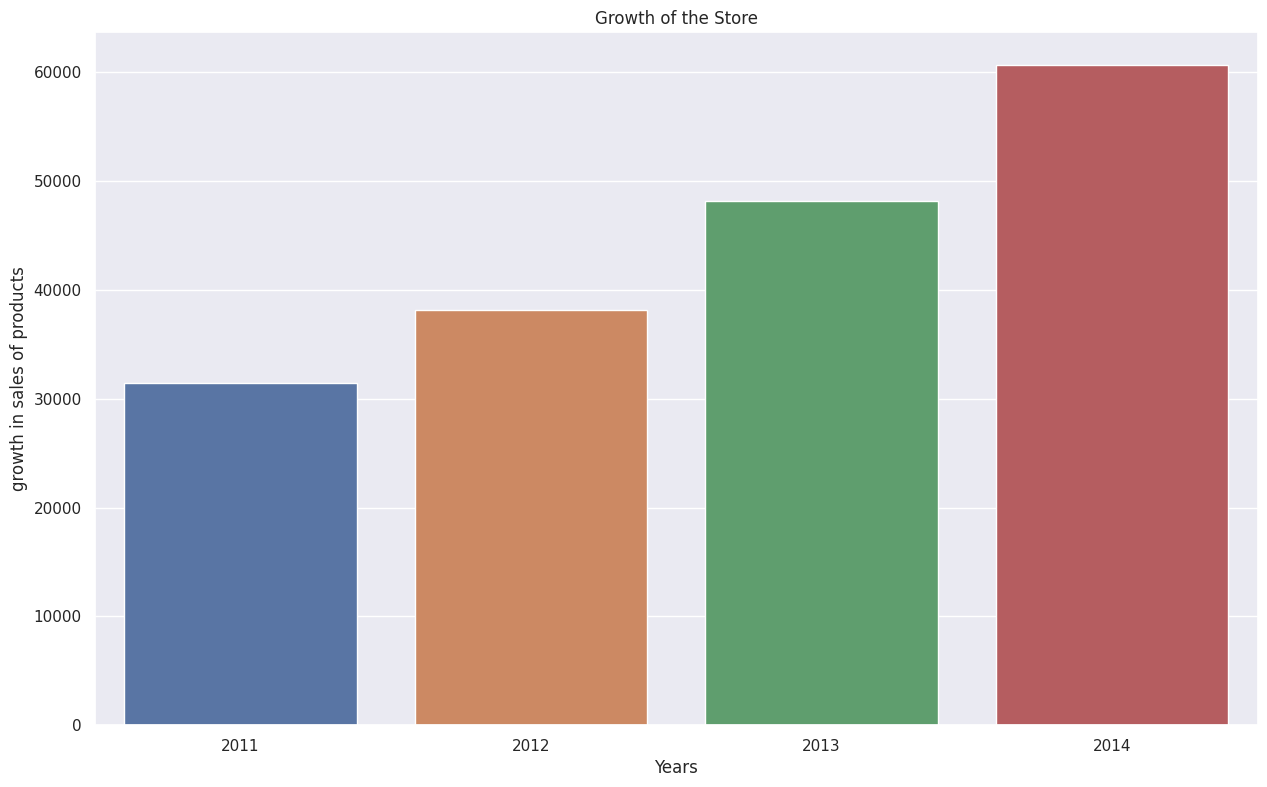

In [49]:
S1=[2011,2012,2013,2014]
S2=[31443,38111,48136,60622]
sns.barplot(x=S1,y=S2)
plt.xlabel("Years")
plt.ylabel("growth in sales of products")
plt.title("Growth of the Store")

**The Sales of the store has increased each year.**

The United States, China, India, United Kingdom and France are the Top 5 Profitable Countries.

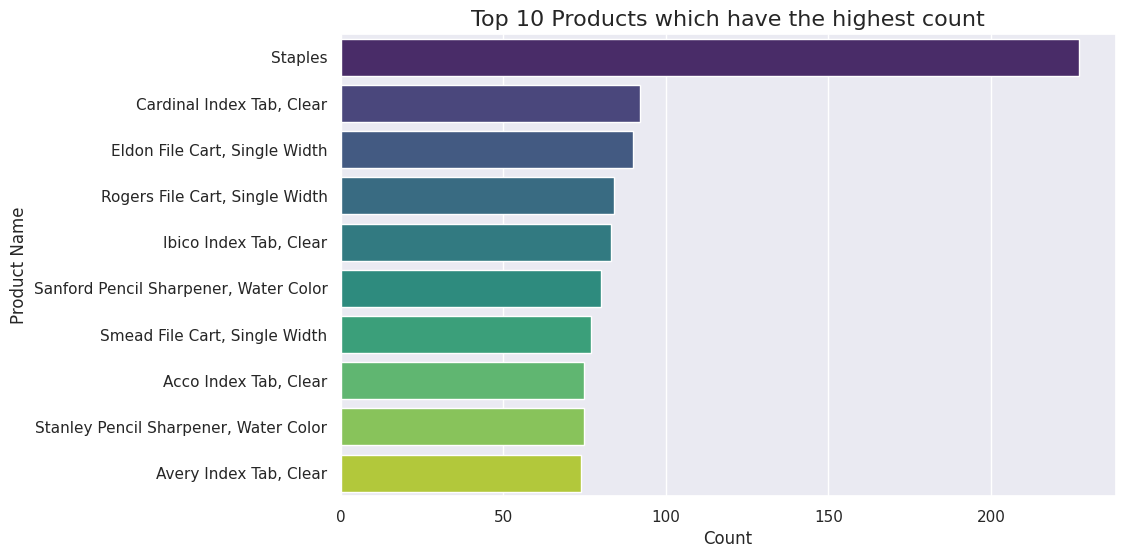

In [50]:
# check top 10 products which have the highest sales

plt.figure(figsize=(10, 6))
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.show()

# **What is the most preferred Shipment Mode?**

In [51]:
df['ship_mode'].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

<Axes: ylabel='count'>

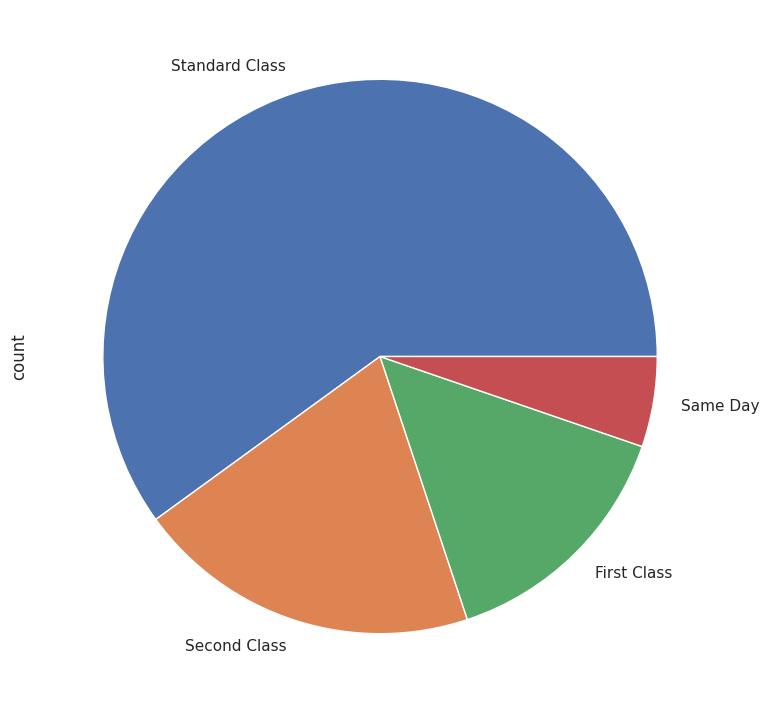

In [52]:
df['ship_mode'].value_counts().plot.pie()

# **Creating only Profit/Loss Dataframe to calculate Total Profit & Loss of the superstore from 2011-2014 and the Net Profit**

In [53]:
df_profit=df[df['profit'] > 0]

In [54]:
df_loss=df[df['profit'] < 0]

In [55]:
#Shape of the profit Dataframe
df_profit.shape

(38079, 21)

In [56]:
#Shape of the loss Dataframe
df_loss.shape

(12543, 21)

**Total Profit?**

In [57]:
Total_Profit = df_profit['profit'].sum()
print(Total_Profit)

2389392.212


**Total Loss?**

In [58]:
Total_loss=np.negative(df_loss['profit'].sum())
print("Total_loss = %.2f" %Total_loss)

Total_loss = 920357.39


**Net Profit?**

In [59]:
Net_Profit = Total_Profit - Total_loss
print(Net_Profit)

1469034.8212799998


In [60]:
df_Net_Profit=pd.DataFrame({'Total_Profit': {0: 2389392},
                            'Total_loss':{0: 920357},
                            '         ':{0: '='},
                            'Net_Profit':{0: 1469035}})

In [61]:
df_Net_Profit

,Total_Profit,Total_loss,,Net_Profit
0,2389392,920357,=,1469035


<Axes: >

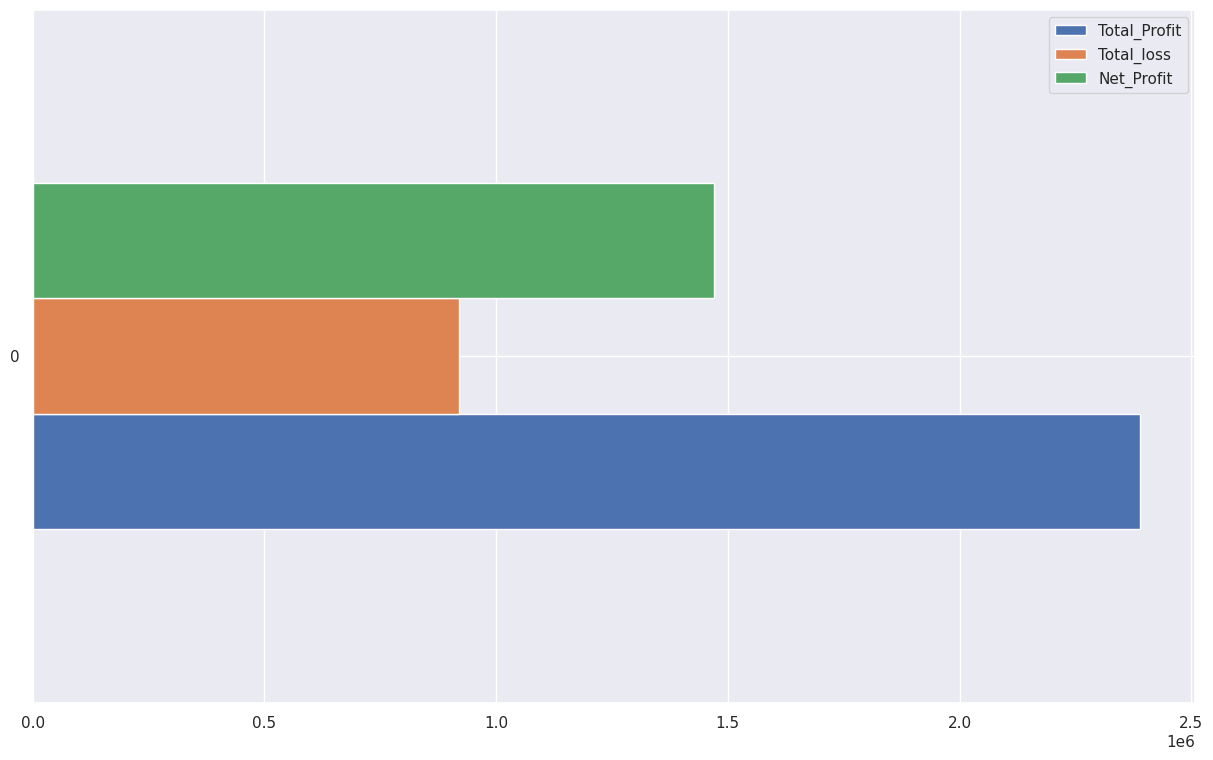

In [62]:
df_Net_Profit.plot(kind='barh')

# **Scatter Plot**

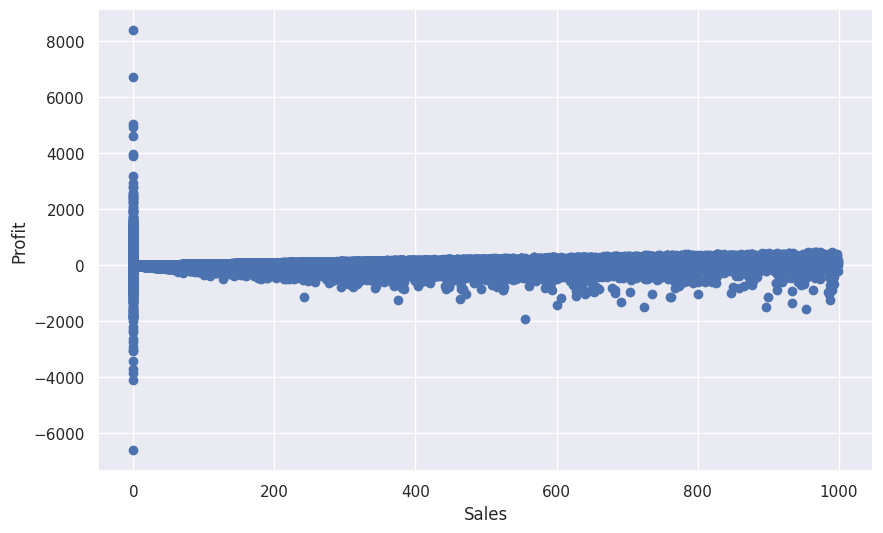

In [63]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["sales"] , df["profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

## Creating Map

/tmp/ipykernel_18/365625879.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


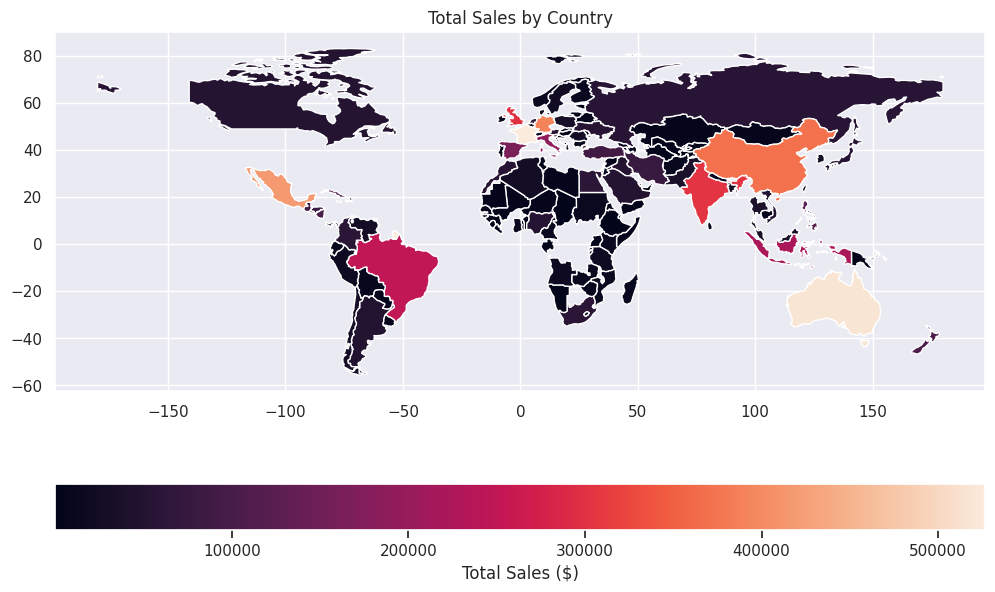

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Example dataset with country data (replace with your data)
country_data = df.groupby('country')['sales'].sum().reset_index()

# Merge world map with country data
world = world.merge(country_data, how='left', left_on='name', right_on='country')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(column='sales', ax=ax, legend=True,
           legend_kwds={'label': 'Total Sales ($)', 'orientation': "horizontal"})
ax.set_title('Total Sales by Country')
plt.show()
